# Logreg

In [ ]:
import numpy as np

def sigmoid(z): 
    y_hat = 1/(1+np.exp(-z))
    return y_hat


##  Loss func for logic regression:

$
    \lbrace
    ^{y=1, Loss(h(x), y) = -log(h(x))}
    _{y=0, loss(h(x), y) = -log(1-h(x))}
$

## Gradient:

$
    w = w - \alpha * \frac{\partial}{\partial{W}} L(W)
$

ae:

$
    w = w - \frac{\alpha}{N}
            \sum^N_{i=1}
            (
                y^{(i)} - (W * X^{(i)}) * X^{(i)}
            )
$

In [ ]:
import numpy as np

def sigmoid(z): 
    y_hat = 1/(1+np.exp(-z))
    return y_hat
def gradient_descent(X, y, w, b, lr, iter):
    l_history = np.zeros(iter)
    w_history = np.zeros(iter, w.shape[0], w.shape[1]) # the weight tensor
    b_history = np.zeros(iter)

    for i in range(iter):

        "sigmoid"
        y_hat = sigmoid(np.dot(X,w)) 

        "Loss function for specific"
        loss =  - (
                    y * np.log(y_hat) +
                   (1-y) * np.log(1-y_hat)
                )
        
        "Get the gradient / derivative"
        derivative_w = np.dot(X.T,  y_hat-y)  /  X.shape[0]
        derivative_b = np.sum(y_hat - y)/ X.shape[0]

        # iterate
        w -= lr * derivative_w
        b -= lr * derivative_b

        l_history[i] = loss_function(X,y,w,b) # the loss in gradient
        print(f"The {i+1}th: accumulated loss: {l_history[i]}")

        w_history[i] = w
        b_history[i] = b
        
    return l_history, w_history, b_history

    

In [ ]:
"About the heart diease"

import numpy as np
import pandas as pd

df_heart = pd.read_csv("./dataset/4_heart.csv")
df_heart.head()


In [ ]:
import matplotlib.pyplot as plt

df_heart.target.value_counts()


plt.scatter( x = df_heart.age[df_heart.target==1],
             y = df_heart.thalach[df_heart.target==1], # max heart beat rating
             c='red')

plt.scatter( x = df_heart.age[df_heart.target==0],
             y = df_heart.thalach[df_heart.target==0], # max heart beat rating
             marker='^')
plt.legend(["Diease", "Nodiease"])
plt.xlabel("Age")
plt.ylabel("Hear Rate")
plt.show()


In [ ]:
X= df_heart.drop(['target'], axis=1) # the feature
y= df_heart.target.values # label
y= y.reshape(-1,1) # rearrange the index 
print(f"Tensor X: {X.shape}")
print(f"Tensor y: {y.shape}")


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) #拟合在应用
X_test = scaler.transform(X_test) # 直接应用

## the y (labels) did not need, cause already in [-1,1]


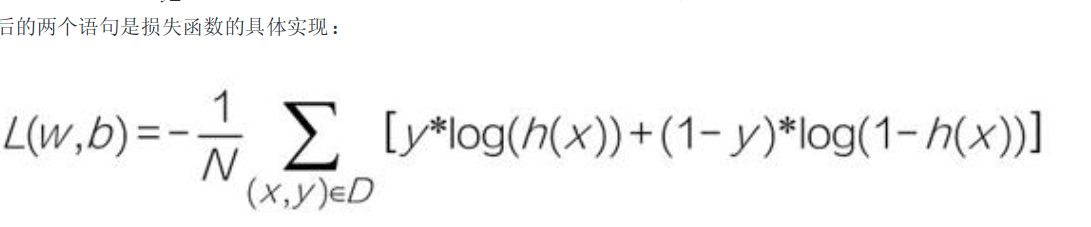

In [ ]:
import numpy as np

sigmoid = lambda z : 1/(1+np.exp(-z)) # y_hat

"this time add a b, did not assume it as W_0"
def loss_function(X, y, w, b):
    y_hat = sigmoid( np.dot(X,w)+b )
    loss = -( y*np.log(y_hat) + (1-y) * np.log( 1-y_hat) )
    cost = np.sum(loss)/ X.shape[0]
    return cost

def gradient_descent(X, y, w, b, lr, iter):
    l_history = np.zeros(iter)
    w_history = np.zeros((iter,w.shape[0], w.shape[1])) # the weight tensor
    b_history = np.zeros(iter)

    for i in range(iter):

        "sigmoid"
        y_hat = sigmoid(np.dot(X,w)) 

        "Loss function for specific"
        loss =  - (
                    y * np.log(y_hat) +
                   (1-y) * np.log(1-y_hat)
                )
        
        "Get the gradient / derivative"
        derivative_w = np.dot(X.T,  y_hat-y)  /  X.shape[0]
        derivative_b = np.sum(y_hat - y)/ X.shape[0]

        # iterate
        w -= lr * derivative_w
        b -= lr * derivative_b

        l_history[i] = loss_function(X,y,w,b) # the loss in gradient
        print(f"The {i+1}th: accumulated loss: {l_history[i]}")

        w_history[i] = w
        b_history[i] = b
        
    return l_history, w_history, b_history

def predict(X, w, b):
    z = np.dot(X, w) +b
    y_hat = sigmoid(z)
    y_pred = np.zeros( (y_hat.shape[0],1))

    for i in range(y_hat.shape[0]):
        if y_hat[i, 0] < 0.5:
            y_pred[i,0] = 0
        else:
            y_pred[i,0] = 1
    
    return y_pred

def logic_regession(X, y ,w, b, lr, iter):
    loss_history, weight_history, bias_history, = gradient_descent(X, y ,w, b, lr, iter)
    print(f"The final loss in train: {loss_history[-1]}")

    "Final predict"
    y_pred = predict(X, weight_history[-1], bias_history[-1]) 
    
    training_acc = 100 - np.mean(np.abs(y_pred - y_train))* 100
    print(f"ACC: {training_acc}")
    return loss_history,weight_history, bias_history
    


In [ ]:
dim = X.shape[1]
weight= np.full( (dim,1), 0.1)
bias=0 
alpha=1
iteration=100
# weight.shape
loss_history,weight_history, bias_history= logic_regession( X_train,y_train, weight, bias, alpha, iteration)



loss_history_test = np.zeros(iteration) # 初始化历史损失

for i in range(iteration): #求训练过程中不同参数带来的测试集损失

    loss_history_test[i] = loss_function(X_test, y_test,

    weight_history[i], bias_history[i])

    index = np.arange(0, iterations, 1)

plt.plot(index, loss_history, c='blue', linestyle='solid')

plt.plot(index, loss_history_test, c='red', linestyle='dashed')

plt.legend(["Training Loss", "Test Loss"])

plt.xlabel("Number of Iteration")

plt.ylabel("Cost")

plt.show() # 同时显示训练集和测试集损失曲线



In [ ]:

"Test set"
y_pred = predict(X_test, weight_history[-1], bias_history[-1])
testing_acc = np.mean( np.abs(y_pred- y_test) ) *100 - 100
testing_acc*=-1
print(f"The ACC of test-set: {testing_acc}")
# print(y_pred)


loss_history_test = np.zeros(iteration)
for i in range(iteration):
    loss_history_test[i] = loss_function(X_test, y_test, weight_history[i], bias_history[i])

index = np.arange(0, iteration, 1)

plt.plot(index, loss_history, c='blue', linestyle='solid')
plt.plot(index, loss_history_test, c='red', linestyle='dashed')

plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Number of Iteration")
plt.ylabel("Cost")
plt.show() # 同时显示训练集和测试集损失曲线

In [ ]:
"Use library"
